In [1]:
# Importando dependências

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statsmodels.api as sm
from scipy import stats
from sklearn.tree import DecisionTreeRegressor  
import math
import os
! pip install patool
import patoolib

You should consider upgrading via the 'c:\users\felipe catapano\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.


In [2]:
# Descomprimindo arquivo .rar e lendo o dataset
try:
    patoolib.extract_archive("vehicles.rar", outdir=os.getcwd())
    os.remove("vehicles.rar")
except:
    pass
Dataset = pd.read_csv('vehicles.csv')
Dataset = Dataset.iloc[28: , :]
Dataset.head(10)

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
28,7316814758,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,22590,2010.0,chevrolet,silverado 1500,good,8 cylinders,...,NaN,pickup,blue,https://images.craigslist.org/00R0R_lwWjXSEWNa...,Carvana is the safer way to buy a car During t...,NaN,al,32.5900,-85.480000,2021-05-04T12:31:08-0500
29,7316814989,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,39590,2020.0,chevrolet,silverado 1500 crew,good,8 cylinders,...,NaN,pickup,red,https://images.craigslist.org/01212_jjirIWa0y0...,Carvana is the safer way to buy a car During t...,NaN,al,32.5900,-85.480000,2021-05-04T12:31:25-0500
30,7316743432,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,30990,2017.0,toyota,tundra double cab sr,good,8 cylinders,...,NaN,pickup,red,https://images.craigslist.org/00x0x_1y9kIOzGCF...,Carvana is the safer way to buy a car During t...,NaN,al,32.5900,-85.480000,2021-05-04T10:41:31-0500
31,7316356412,https://auburn.craigslist.org/cto/d/auburn-uni...,auburn,https://auburn.craigslist.org,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,...,full-size,truck,black,https://images.craigslist.org/00404_l4loxHvdQe...,2013 F-150 XLT V6 4 Door. Good condition. Leve...,NaN,al,32.5920,-85.518900,2021-05-03T14:02:03-0500
32,7316343444,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,27990,2012.0,gmc,sierra 2500 hd extended cab,good,8 cylinders,...,NaN,pickup,black,https://images.craigslist.org/00V0V_ftJbKrOgdi...,Carvana is the safer way to buy a car During t...,NaN,al,32.5900,-85.480000,2021-05-03T13:41:25-0500
33,7316304717,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,34590,2016.0,chevrolet,silverado 1500 double,good,6 cylinders,...,NaN,pickup,silver,https://images.craigslist.org/00E0E_iKN07Sh7ou...,Carvana is the safer way to buy a car During t...,NaN,al,32.5900,-85.480000,2021-05-03T12:41:33-0500
34,7316285779,https://auburn.craigslist.org/cto/d/auburn-201...,auburn,https://auburn.craigslist.org,35000,2019.0,toyota,tacoma,excellent,6 cylinders,...,NaN,truck,grey,https://images.craigslist.org/00101_dXoZTH7iVm...,Selling my 2019 Toyota Tacoma TRD Off Road Dou...,NaN,al,32.6013,-85.443974,2021-05-03T12:12:59-0500
35,7316257769,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,29990,2016.0,chevrolet,colorado extended cab,good,6 cylinders,...,NaN,pickup,red,https://images.craigslist.org/00N0N_1xMPvfxRAI...,Carvana is the safer way to buy a car During t...,NaN,al,32.5900,-85.480000,2021-05-03T11:31:14-0500
36,7316133914,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,38590,2011.0,chevrolet,corvette grand sport,good,8 cylinders,...,NaN,other,red,https://images.craigslist.org/00U0U_kKYnS1LWh8...,Carvana is the safer way to buy a car During t...,NaN,al,32.5900,-85.480000,2021-05-03T07:50:35-0500
37,7316130053,https://auburn.craigslist.org/cto/d/opelika-19...,auburn,https://auburn.craigslist.org,4500,1992.0,jeep,cherokee,excellent,6 cylinders,...,NaN,NaN,NaN,https://images.craigslist.org/01010_7EM2aot64G...,192k miles brand new TSLs 4x4 jeep xj. 4x4 wor...,NaN,al,32.6454,-85.378300,2021-05-03T07:38:05-0500


# Quanto vale seu carro usado no Craigslist?

### A partir da análise de dados como quilometragem, ano do modelo, estado de conservação, tipo de combustível, entre outros, pretendemos prever o preço de revenda de um carro na plataforma Craigslist.   

In [3]:
# Remoção de outliers: Removeremos todas as linhas que tenham um preço com Z score(Número de desvios padrão
# de distância da média) maior ou igual a 3

z_scores = stats.zscore(Dataset.price)
abs_z = np.abs(z_scores)
Dataset['sigma'] = abs_z

Dataset = Dataset.loc[Dataset.sigma < 3,:]



# Análise exploratória -- Preços

Preço é a variável target do modelo. Assim, é de interesse analisar quais são os fatores fundamentais que influenciam em seu valor. Nesse sentido, através de gráficos de dispersão, histogramas e outras ferramentas estatísticas, determinaremos as features a serem consideradas.

clean         0.967701
rebuilt       0.017245
salvage       0.009240
lien          0.003397
missing       0.001944
parts only    0.000473
Name: title_status, dtype: float64


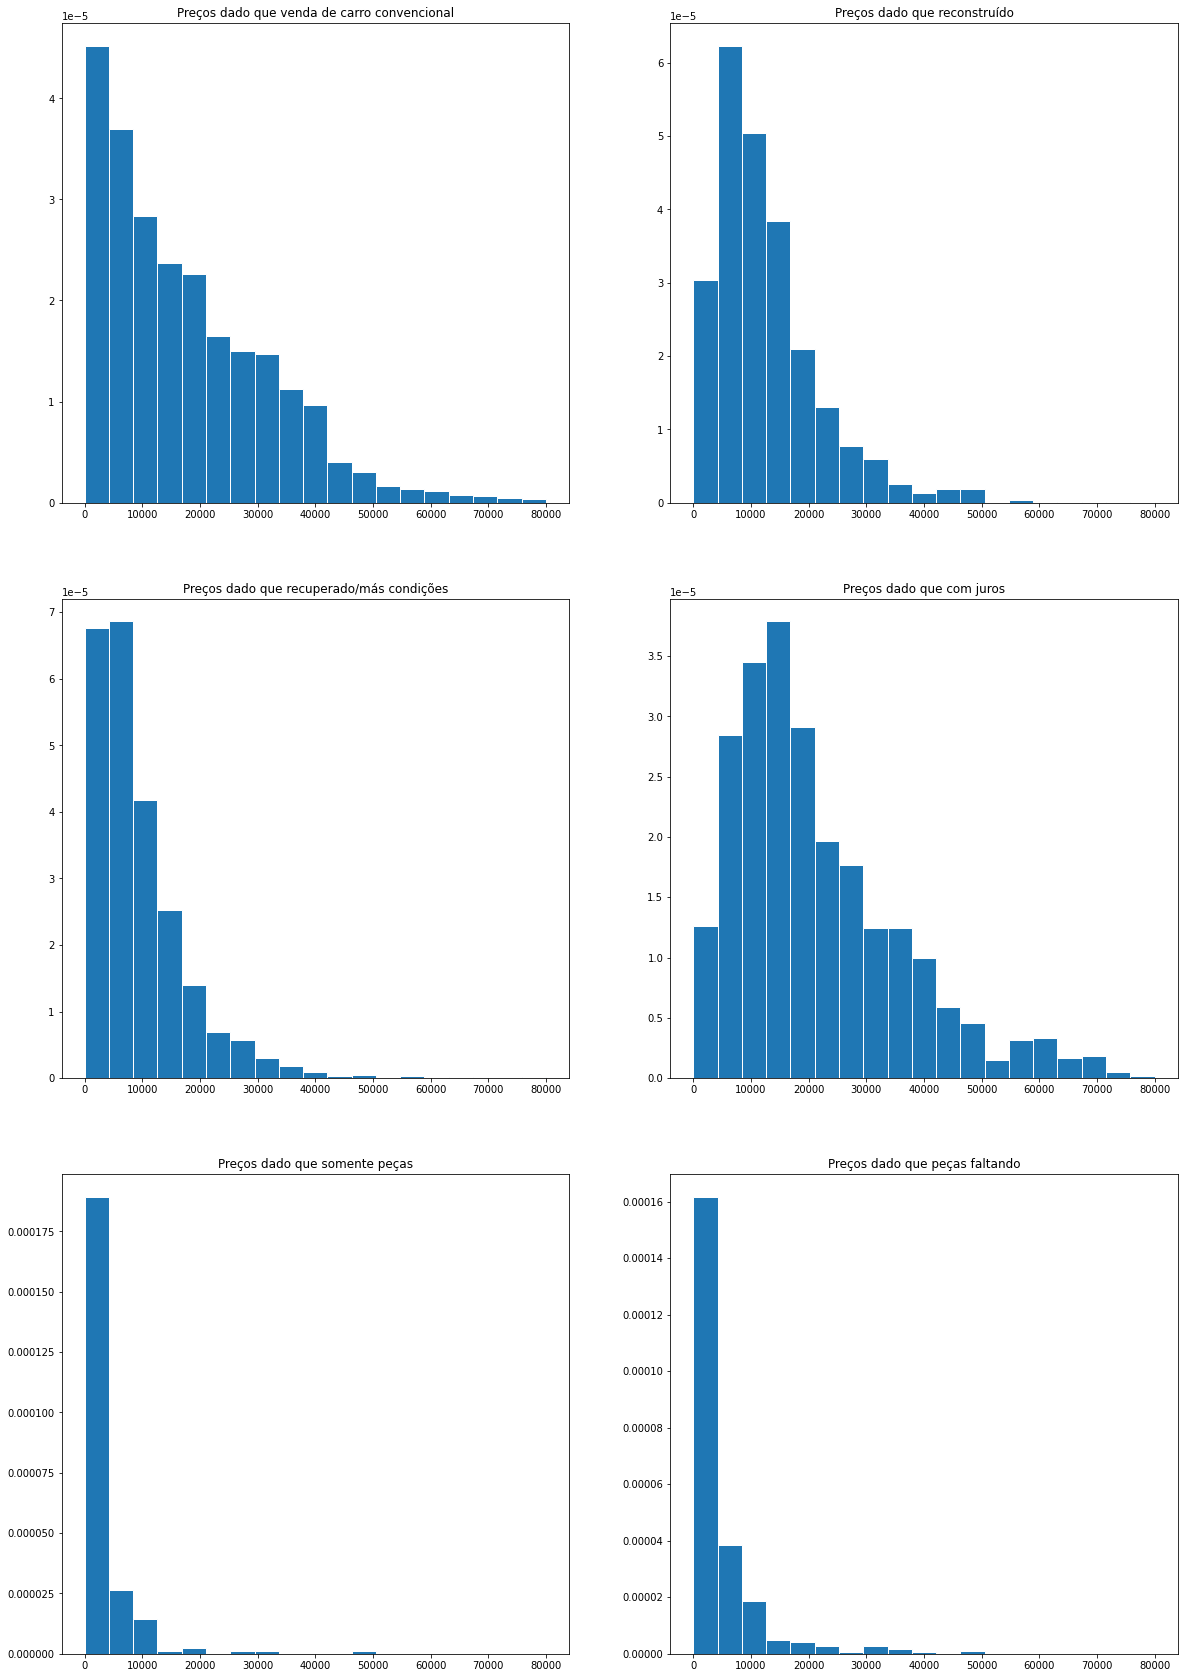

In [4]:
# Primeiramente, devemos decidir quais são as condições que o modelo assume. Imaginamos que venda de peças de carros
# ou de carros com peças faltando são casos significativamente diferentes do que a de um carro convencional. 

print(Dataset.title_status.value_counts(normalize=True))

# Para observar as diferenças:

bins = np.linspace(0,8e+4,20)

plt.figure(figsize=(20,30))
plt.subplot(321)
plt.title('Preços dado que venda de carro convencional')
plt.hist(Dataset.loc[Dataset.title_status == 'clean']['price'],bins,edgecolor='white',density=True)
plt.subplot(322)
plt.title('Preços dado que reconstruído')
plt.hist(Dataset.loc[Dataset.title_status == 'rebuilt']['price'],bins,edgecolor='white',density=True)
plt.subplot(323)
plt.title('Preços dado que recuperado/más condições')
plt.hist(Dataset.loc[Dataset.title_status == 'salvage']['price'],bins,edgecolor='white',density=True)
plt.subplot(324)
plt.title('Preços dado que com juros')
plt.hist(Dataset.loc[Dataset.title_status == 'lien']['price'],bins,edgecolor='white',density=True)
plt.subplot(325)
plt.title('Preços dado que somente peças')
plt.hist(Dataset.loc[Dataset.title_status == 'parts only']['price'],bins,edgecolor='white',density=True)
plt.subplot(326)
plt.title('Preços dado que peças faltando')
plt.hist(Dataset.loc[Dataset.title_status == 'missing']['price'],bins,edgecolor='white',density=True)
plt.show()



# Conclusão:

Percebe-se que os preços de peças, carros com peça faltando e em más condições destoam bastante do convencional por praticamente não serem vendidos à valores mais altos. Já no caso de carros "com juros" (car lien é a venda de um carro em parcelas, na qual o vendedor cobra juros por segurança, podendo recuperar o carro caso não seja pago), eles costumam ter valores maiores que carros convencionais. Para carros reconstruídos, eles não cotumam ser vendidos por preços muito baixos, mas tendem a ter preços menores que o convencional na maioria dos casos.

Como a maioria (cerca de 96%) da base de dados é composta por carros convencionais, e as categorias restantes possuem distribuições significativamente diferentes, escolhemos filtrar o modelo para venda de carros convencionais.

count    372813.000000
mean      19198.605180
std       15435.202175
min           1.000000
25%        7495.000000
50%       15900.000000
75%       27990.000000
max      470000.000000
Name: price, dtype: float64


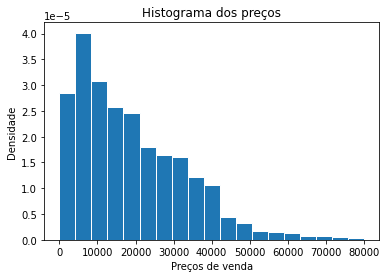

In [28]:
#Retirando preços excepcionais (nulos ou acima de 500000 dólares)
Dataset = Dataset.loc[Dataset['price'] > 0]
Dataset = Dataset.loc[Dataset['price'] < 0.5*(10**6)]

# Histograma de preços 
dados = Dataset.loc[Dataset.title_status == 'clean',:]

# Valores de interesse para basear as faixas
print(dados.price.describe())

bins = np.linspace(0,8e+4,20)

plt.hist(dados.price,bins=bins,edgecolor='white',density=True)
plt.title('Histograma dos preços')
plt.xlabel('Preços de venda')
plt.ylabel('Densidade')
plt.show()

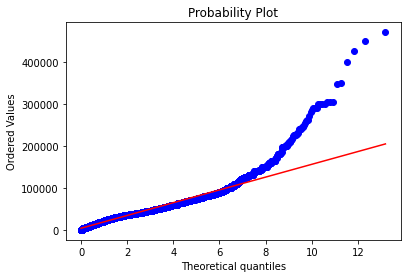

In [29]:
# O gráfico se assemelha com uma exponencial, para verificar temos que: 

stats.probplot(dados.price,dist='expon',plot=plt)
plt.show()

-0.17465441243385058


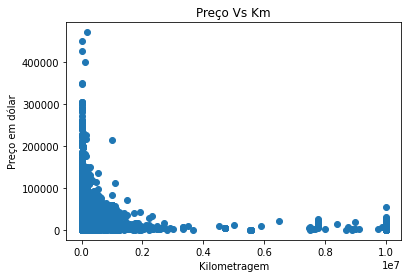

In [31]:
# Kilometragem e preço são relacionados?

print(dados.price.corr(dados.odometer))

plt.scatter(dados.odometer,dados.price)
plt.title('Preço Vs Km')
plt.ylabel('Preço em dólar')
plt.xlabel('Kilometragem')
plt.show()

# Correlação bem fraca e negativa

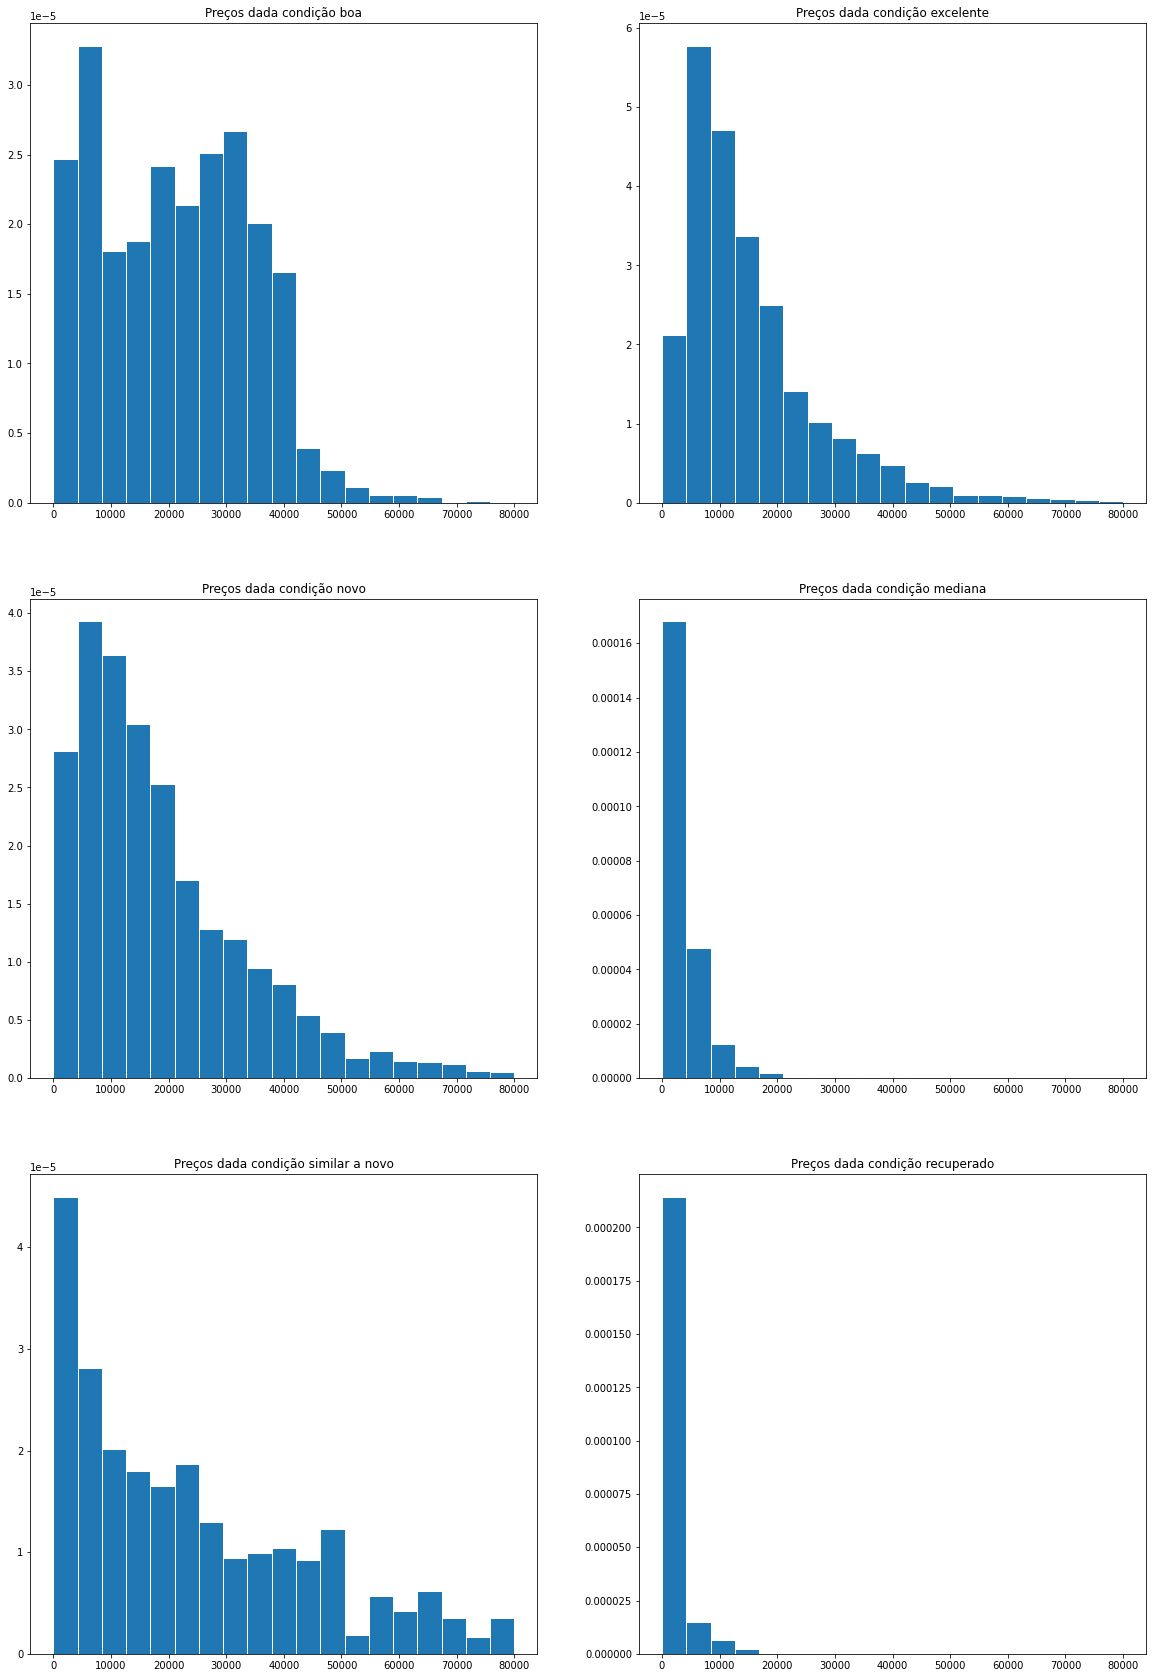

In [32]:
# Preço e condição se relacionam?

plt.figure(figsize=(20,30))
plt.subplot(321)
plt.title('Preços dada condição boa')
plt.hist(dados.loc[dados.condition == 'good']['price'],bins,edgecolor='white',density=True)
plt.subplot(322)
plt.title('Preços dada condição excelente')
plt.hist(dados.loc[dados.condition == 'excellent']['price'],bins,edgecolor='white',density=True)
plt.subplot(323)
plt.title('Preços dada condição novo')
plt.hist(dados.loc[dados.condition == 'like new']['price'],bins,edgecolor='white',density=True)
plt.subplot(324)
plt.title('Preços dada condição mediana')
plt.hist(dados.loc[dados.condition == 'fair']['price'],bins,edgecolor='white',density=True)
plt.subplot(325)
plt.title('Preços dada condição similar a novo')
plt.hist(dados.loc[dados.condition == 'new']['price'],bins,edgecolor='white',density=True)
plt.subplot(326)
plt.title('Preços dada condição recuperado')
plt.hist(dados.loc[dados.condition == 'salvage']['price'],bins,edgecolor='white',density=True)
plt.show()


automatic    0.776875
other        0.163108
manual       0.060018
Name: transmission, dtype: float64


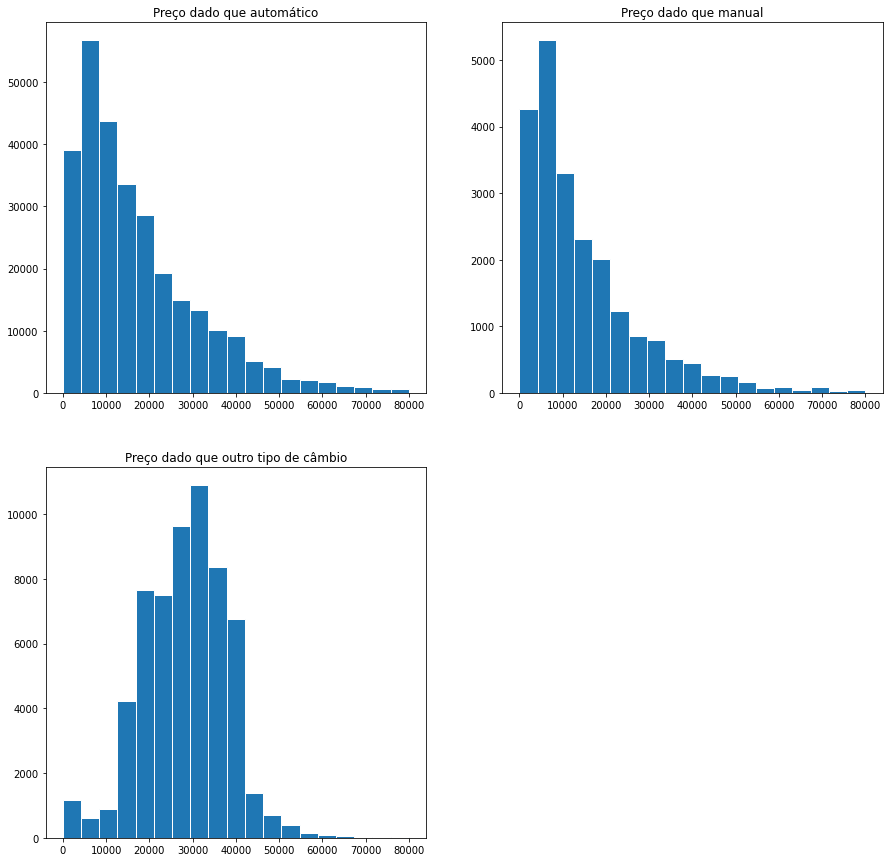

In [33]:
# Preço e tipo de câmbio se relacionam?

print(dados.transmission.value_counts(normalize=True))

plt.figure(figsize=(15,15))
plt.subplot(221)
plt.hist(dados.loc[dados.transmission=='automatic']['price'],bins=bins,edgecolor='white')
plt.title('Preço dado que automático')
plt.subplot(222)
plt.hist(dados.loc[dados.transmission=='manual']['price'],bins=bins,edgecolor='white')
plt.title('Preço dado que manual')
plt.subplot(223)
plt.hist(dados.loc[dados.transmission=='other']['price'],bins=bins,edgecolor='white')
plt.title('Preço dado que outro tipo de câmbio')
plt.show()

# Percebe-se que carros automáticos e manuais tem uma distribuição relativamente parecida, diferentemente
# dos outros tipos, que destoam do padrão de preços.



0.3292635566894417


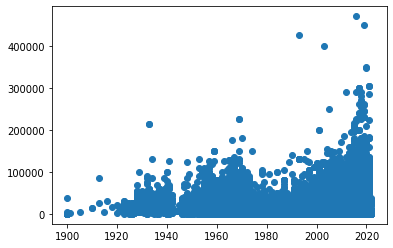

In [35]:
# Preço e ano de fabricação se relacionam?

print(dados.price.corr(dados.year))
plt.scatter(dados.year,dados.price)
plt.show()

# Associação fraca e positiva

In [36]:
dum = pd.get_dummies(Dataset, drop_first=False, columns=['year', 'title_status', 'condition', 'transmission', 'cylinders', 'fuel', 'type', 'paint_color', 'manufacturer', 'drive', 'size'])

X = dum.iloc[:, 25:]

results = sm.OLS(dum.price, X).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.831
Model:                            OLS   Adj. R-squared (uncentered):              0.831
Method:                 Least Squares   F-statistic:                              9406.
Date:                Thu, 25 Nov 2021   Prob (F-statistic):                        0.00
Time:                        18:56:49   Log-Likelihood:                     -4.1875e+06
No. Observations:              393894   AIC:                                  8.375e+06
Df Residuals:                  393688   BIC:                                  8.378e+06
Df Model:                         206                                                  
Covariance Type:            nonrobust                                                  
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
year_1918.0                  -2608.2237      1e+04     -0.260      0.795   -2.23e+04     1.7e+04
year_1920.0                  -1.121e+04   7090.171     -1.581      0.114   -2.51e+04    2688.415
year_1921.0                  -9328.6350   7090.259     -1.316      0.188   -2.32e+04    4568.060
year_1922.0                  -6385.6832   5791.782     -1.103      0.270   -1.77e+04    4966.036
year_1923.0                  -5940.7175   1688.661     -3.518      0.000   -9250.443   -2630.992
year_1924.0                  -3765.4221   3351.934     -1.123      0.261   -1.03e+04    2804.268
year_1925.0                  -1.038e+04   3551.573     -2.922      0.003   -1.73e+04   -3417.774
year_1926.0                  -1.032e+04   2517.572     -4.099      0.000   -1.53e+04   -5384.995
year_1927.0                  -7015.6948   1688.345     -4.155      0.000   -1.03e+04   -3706.589
year_1928.0                   6574.7559   1688.152      3.895      0.000    3266.029    9883.483
year_1929.0                  -1157.0433   1361.874     -0.850      0.396   -3826.275    1512.188
year_1930.0                   2356.4632   1249.106      1.887      0.059     -91.746    4804.673
year_1931.0                    158.3881   1349.667      0.117      0.907   -2486.919    2803.695
year_1932.0                    1.11e+04   1386.158      8.006      0.000    8380.763    1.38e+04
year_1933.0                   2.667e+04   2018.941     13.208      0.000    2.27e+04    3.06e+04
year_1934.0                   1.192e+04   1532.081      7.780      0.000    8917.050    1.49e+04
year_1935.0                    945.2350   2104.714      0.449      0.653   -3179.941    5070.411
year_1936.0                    -90.1460   1547.095     -0.058      0.954   -3122.407    2942.115
year_1937.0                   6749.1290   1222.172      5.522      0.000    4353.709    9144.549
year_1938.0                  -1930.3658   1665.770     -1.159      0.247   -5195.225    1334.493
year_1939.0                   3947.8432   1481.777      2.664      0.008    1043.605    6852.081
year_1940.0                   5765.9662   1152.680      5.002      0.000    3506.749    8025.184
year_1941.0                  -3445.3077   1257.000     -2.741      0.006   -5908.990    -981.626
year_1942.0                    566.3801   2688.448      0.211      0.833   -4702.898    5835.658
year_1943.0                  -9146.1585      1e+04     -0.912      0.362   -2.88e+04    1.05e+04
year_1944.0                   -1.74e+04   5794.411     -3.003      0.003   -2.88e+04   -6046.306
year_1945.0                  -4702.1123   7090.873     -0.663      0.507   -1.86e+04    9195.787
year_1946.0                  -6331.5678   1349.405     -4.692      0.000  

In [37]:
regressor = DecisionTreeRegressor(random_state = 0) 
regressor.fit(X, dum.price)
score = regressor.score(X, dum.price)
score

0.9291317657074678